In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_set = pd.read_csv('News_Final.csv')

In [8]:
corr = data_set.corr('pearson')
corr

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
IDLink,1.000000,0.005025,0.024476,0.105783,0.037486,-0.032461
SentimentTitle,0.005025,1.000000,0.183555,-0.003807,-0.010266,0.003411
SentimentHeadline,0.024476,0.183555,1.000000,0.000456,0.001741,0.005922
Facebook,0.105783,-0.003807,0.000456,1.000000,0.509049,0.067912
GooglePlus,0.037486,-0.010266,0.001741,0.509049,1.000000,0.264733
LinkedIn,-0.032461,0.003411,0.005922,0.067912,0.264733,1.000000


In [9]:
abs(corr['Facebook']).sort_values()

SentimentHeadline    0.000456
SentimentTitle       0.003807
LinkedIn             0.067912
IDLink               0.105783
GooglePlus           0.509049
Facebook             1.000000
Name: Facebook, dtype: float64

In [10]:
X = data_set['SentimentTitle']
Y = data_set['Facebook']

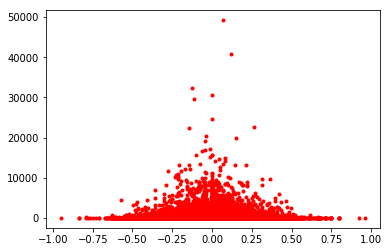

In [11]:
plt.plot(X,Y,'r.')

In [12]:
X = (X-X.min())/(X.max() - X.min())
Y = (Y-Y.min())/(Y.max() - Y.min())

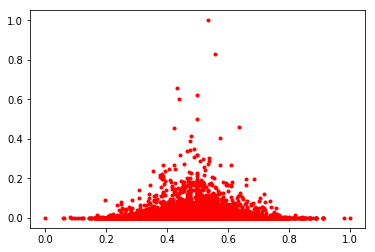

In [13]:
plt.plot(X,Y,'r.')

In [14]:
x = np.array(X)
y = np.array(Y)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [16]:
def hypothesis(a, x, b):
    return a * x + b

In [17]:
def error(a,x,b,y):
    e=0
    m=len(x)#total number of the rows 506
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b)-y[i]),2)
        
    return (1/(2*m)) * e

In [18]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0 
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (1/m) * (hypothesis(a, x[i], b) - y[i]) * x[i]
        grad_b += (1/m) * (hypothesis(a, x[i], b) - y[i])
        
    a= a - grad_a * learning_rate
    b= b - grad_b * learning_rate
    
    return a,b#THIS IS THE NEXT VALUE OF THE A AND B IN ON THE PARABOLA.

In [19]:
def descend(init_a,x,init_b,y,learning_rate,iterations):#we init the a and b values at the first
    a = init_a
    b = init_b
    
    for i in range(iterations):#this is for the NUMBER OF LINES THAT SHOULD BE DRAWN.
        e = error(a,x,b,y)#will get the mean square error
        if i%1000 == 0:#for ever 1000 steps we are printing the error
            print(f"error : {np.sqrt(e)}, a:{a}, b: {b}")
        a, b  = step_gradient(a,x,b,y,learning_rate)#we will decide the next step.
    return a,b

In [20]:
def descend(init_a,x,init_b,y,learning_rate,iterations):#we init the a and b values at the first
    a = init_a
    b = init_b
    
    for i in range(iterations):#this is for the NUMBER OF LINES THAT SHOULD BE DRAWN.
        e = error(a,x,b,y)#will get the mean square error
        if i%1000 == 0:#for ever 1000 steps we are printing the error
            print(f"error : {np.sqrt(e)}, a:{a}, b: {b}")
        a, b  = step_gradient(a,x,b,y,learning_rate)#we will decide the next step.
    return a,b

In [21]:
a = 0
b = 0
learning_rate = 0.01
iterations = 10000

In [22]:
final_a, final_b = descend(a, x_train, b, y_train, learning_rate,iterations)#FINAL SLOPE AND THE FINAL CONSTANT

error : 0.009120645311208809, a:0, b: 0
error : 0.008970909896885213, a:0.0008558646737962467, b: 0.0019036171875969348
error : 0.008970877461473483, a:0.0007875366689321505, b: 0.0019375300606009104
error : 0.008970847575066753, a:0.000721945337043073, b: 0.001970076574405721
error : 0.008970820037350993, a:0.00065898415744352, b: 0.0020013180028089906
error : 0.008970794663756226, a:0.0005985476634485827, b: 0.0020313066785627837
error : 0.008970771284214812, a:0.0005405346174791209, b: 0.002060092835900334
error : 0.008970749742022527, a:0.00048484784149014986, b: 0.0020877246947081504
error : 0.008970729892790902, a:0.0004313940541872326, b: 0.00211424854129948
error : 0.008970711603475177, a:0.0003800837147703607, b: 0.0021397088059488256


In [23]:
x_test[:3]

array([0.59217414, 0.48662146, 0.45950185])

In [24]:
y_test[:3]

array([6.09607413e-05, 1.95074372e-03, 1.72722100e-03])

In [25]:
hypothesis(final_a,x_test[:3],final_b)

array([0.00236006, 0.00232514, 0.00231617])